In [ ]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import (
    roc_auc_score, roc_curve,
    confusion_matrix, accuracy_score,
    precision_score, recall_score
)
import matplotlib.pyplot as plt

In [ ]:
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
csv_path = os.path.join(path, "diabetes.csv")

df = pd.read_csv(csv_path)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**NO one has zero insulin/ zero glucose/ skinThickness / bloodpressure / BMI**


In [ ]:
d=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [ ]:
d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [ ]:
df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df.head()

<ipython-input-11-6bbaf0f19519>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
<ipython-input-11-6bbaf0f19519>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


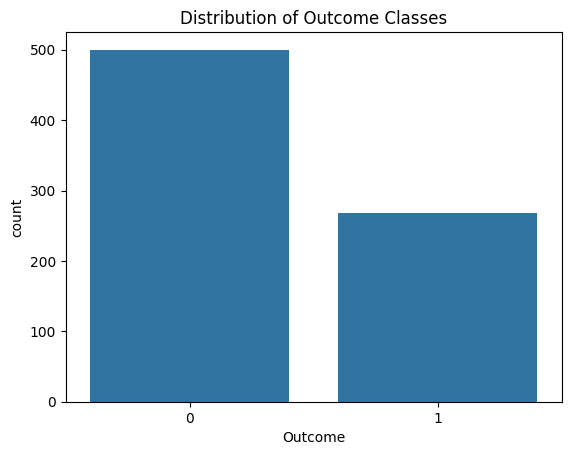

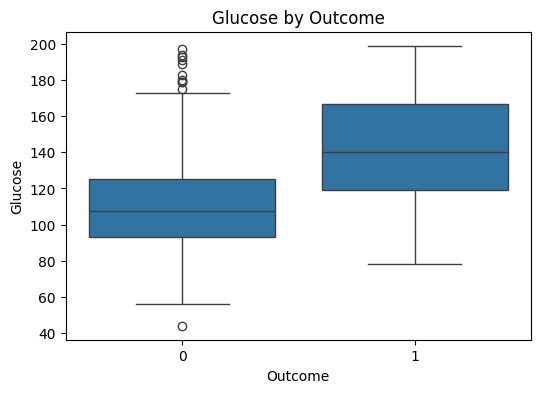

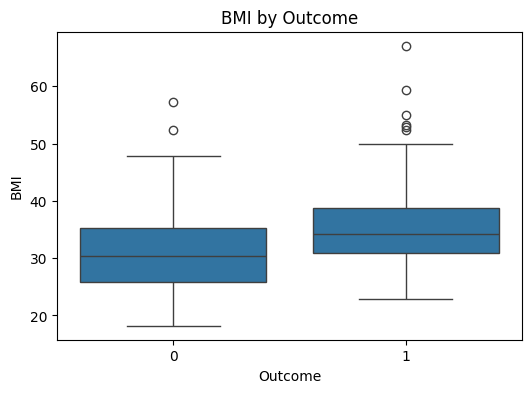

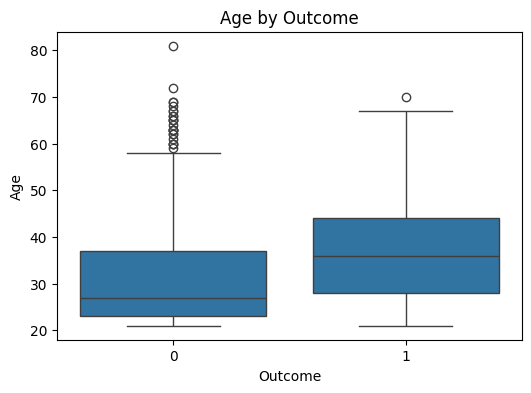

In [ ]:
# Class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome Classes")
plt.show()

# Boxplots for key features
for col in ['Glucose', 'BMI', 'Age']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} by Outcome")
    plt.show()



In [ ]:
# Feature and target separation
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# RFE
rfe_selector = RFE(SVC(kernel='linear'), n_features_to_select=5)
rfe_selector.fit(X_train_sel, y_train_sel)

selected_features = X.columns[rfe_selector.support_]
print("Selected Features:", list(selected_features))


Selected Features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


# Support Vector Machine (SVM)

### Filter selected features


In [ ]:
selected_features = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']
X_selected = df[selected_features]
y = df['Outcome']

In [ ]:
# Step 2: Scale features
scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)


In [ ]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_scaled_selected, y, test_size=0.2, random_state=42
)

In [ ]:
svm_selected = SVC(kernel='linear', probability=True)
svm_selected.fit(X_train_sel, y_train_sel)


SVC(kernel='linear', probability=True)

In [ ]:

y_pred_sel = svm_selected.predict(X_test_sel)

# Step 6: Evaluate
print("Classification Report (SVM with selected features):")
print(classification_report(y_test_sel, y_pred_sel))

Classification Report (SVM with selected features):
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [ ]:
print(f"Accuracy: {accuracy_score(y_test_sel, y_pred_sel) * 100:.2f}%")


Accuracy: 77.92%


In [ ]:
svm_selected = SVC(kernel='rbf', probability=True)
svm_selected.fit(X_train_sel, y_train_sel)

SVC(probability=True)

In [ ]:

# Step 5: Make predictions
y_pred_sel = svm_selected.predict(X_test_sel)

# Step 6: Evaluate
print("Classification Report (SVM with selected features):")
print(classification_report(y_test_sel, y_pred_sel))

Classification Report (SVM with selected features):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
print(f"Accuracy: {accuracy_score(y_test_sel, y_pred_sel) * 100:.2f}%")


Accuracy: 77.27%


### Confusion Matrix


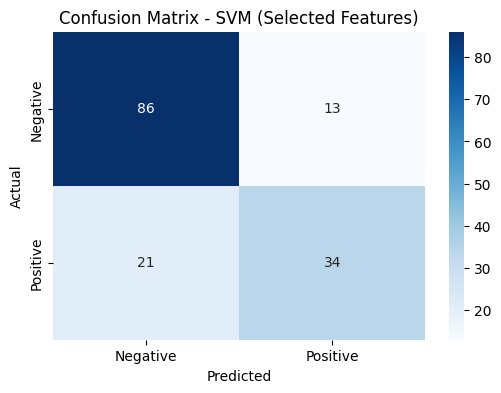

In [ ]:

cm_sel = confusion_matrix(y_test_sel, y_pred_sel)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_sel, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Selected Features)')
plt.show()


### ROC Curve

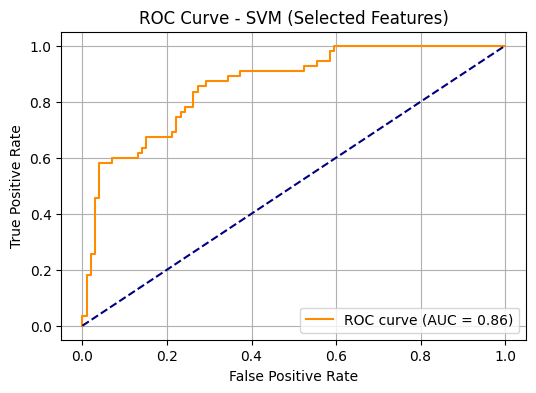

In [ ]:
y_scores_sel = svm_selected.predict_proba(X_test_sel)[:, 1]
fpr_sel, tpr_sel, thresholds_sel = roc_curve(y_test_sel, y_scores_sel)
roc_auc_sel = auc(fpr_sel, tpr_sel)

plt.figure(figsize=(6, 4))
plt.plot(fpr_sel, tpr_sel, color='darkorange', label=f'ROC curve (AUC = {roc_auc_sel:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Selected Features)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## RBF

In [ ]:

svm_rbf = SVC(kernel='rbf', C=1.0, probability=True)
svm_rbf.fit(X_train_sel, y_train_sel)

# Predict
y_pred_rbf = svm_rbf.predict(X_test_sel)

# Evaluate
print("Classification Report (RBF SVM):")
print(classification_report(y_test_sel, y_pred_rbf))
print(f"Accuracy: {accuracy_score(y_test_sel, y_pred_rbf) * 100:.2f}%")




Classification Report (RBF SVM):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Accuracy: 77.27%


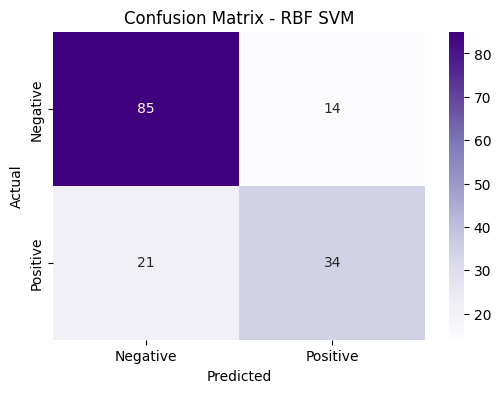

In [ ]:

# Confusion Matrix
cm_rbf = confusion_matrix(y_test_sel, y_pred_rbf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RBF SVM')
plt.show()


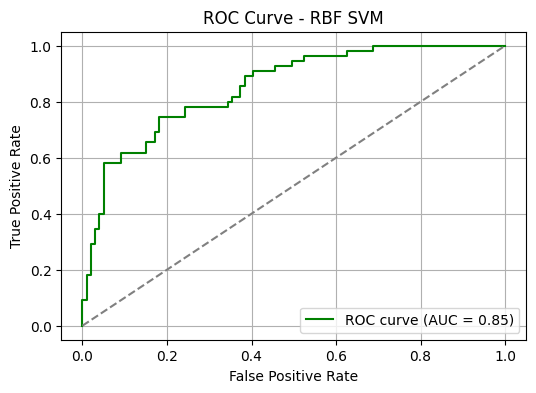

In [ ]:
# ROC Curve
y_scores_rbf = svm_rbf.predict_proba(X_test_sel)[:, 1]
fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test_sel, y_scores_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rbf, tpr_rbf, color='green', label=f'ROC curve (AUC = {roc_auc_rbf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RBF SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Grid Search for poly kernel only


In [148]:
param_grid_poly = {
    'kernel': ['poly'],
    'C': [10],
    'gamma': [0.01, 0.1, 1],
    'degree': [2, 3, 4]
}

svm_poly = SVC()
grid_poly = GridSearchCV(estimator=svm_poly, param_grid=param_grid_poly,
                         scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_poly.fit(X_train_sel, y_train_sel)

print("Best Parameters for Poly Kernel:")
print(grid_poly.best_params_)

best_poly = grid_poly.best_estimator_
y_pred_poly = best_poly.predict(X_test_sel)

print("\nClassification Report (Poly Kernel):")
print(classification_report(y_test_sel, y_pred_poly))
print(f"Test Accuracy (Poly Kernel): {accuracy_score(y_test_sel, y_pred_poly) * 100:.2f}%")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for Poly Kernel:
{'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

Classification Report (Poly Kernel):
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        99
           1       0.76      0.47      0.58        55

    accuracy                           0.76       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.76      0.76      0.74       154

Test Accuracy (Poly Kernel): 75.97%


# Grid Search for sigmoid kernel only

In [149]:
param_grid_sigmoid = {
    'kernel': ['sigmoid'],
    'C': [10],
    'gamma': [0.01, 0.1, 1]
}

svm_sigmoid = SVC()
grid_sigmoid = GridSearchCV(estimator=svm_sigmoid, param_grid=param_grid_sigmoid,
                            scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_sigmoid.fit(X_train_sel, y_train_sel)

print("\nBest Parameters for Sigmoid Kernel:")
print(grid_sigmoid.best_params_)

best_sigmoid = grid_sigmoid.best_estimator_
y_pred_sigmoid = best_sigmoid.predict(X_test_sel)

print("\nClassification Report (Sigmoid Kernel):")
print(classification_report(y_test, y_pred_sigmoid))
print(f"Test Accuracy (Sigmoid Kernel): {accuracy_score(y_test_sel, y_pred_sigmoid) * 100:.2f}%")


Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Parameters for Sigmoid Kernel:
{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}

Classification Report (Sigmoid Kernel):
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Test Accuracy (Sigmoid Kernel): 75.32%


# The Best Kernel

In [146]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [ ]:
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1, 10]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'degree': [2, 3, 4]
    },
    {
        'kernel': ['sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1]
    }
]

In [ ]:
svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


In [ ]:
grid_search.fit(X_train_sel, y_train_sel)


In [147]:
# Get best parameters and estimator
print("Best Parameters Found:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_sel)

print("\nClassification Report on Test Set:")
print(classification_report(y_test_sel, y_pred_sel))

print(f"Test Accuracy: {accuracy_score(y_test_sel, y_pred_sel) * 100:.2f}%")

Fitting 5 folds for each of 56 candidates, totalling 280 fits
Best Parameters Found:
{'C': 10, 'kernel': 'linear'}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Test Accuracy: 77.27%


## Evaluate the model


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc


### **Assumption 1:Validation Curve**

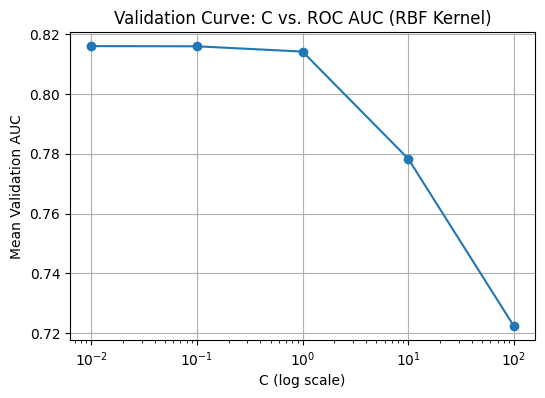

In [ ]:
param_range = [0.01, 0.1, 1, 10, 100]

train_scores, test_scores = validation_curve(
    SVC(kernel='rbf', gamma='scale'),
    X_train_sel, y_train_sel,
    param_name='C',
    param_range=param_range,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.semilogx(param_range, test_mean, marker='o')
plt.title('Validation Curve: C vs. ROC AUC (RBF Kernel)')
plt.xlabel('C (log scale)')
plt.ylabel('Mean Validation AUC')
plt.grid(True)
plt.show()


### Assumption 2: Absence of Multicollinearity

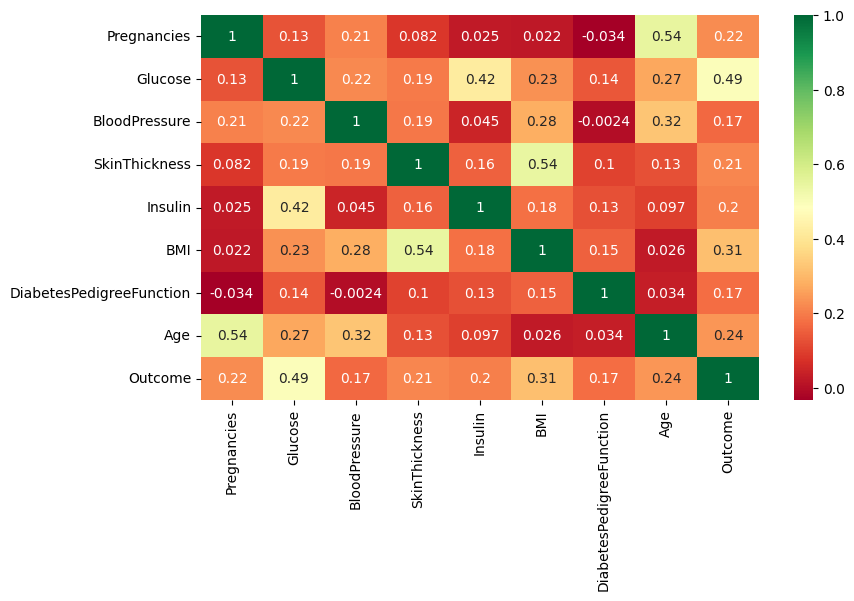

In [152]:
corrMatrix = df.corr()
plt.subplots(figsize=(9, 5))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    Feature        VIF
0               Pregnancies   3.273488
1                   Glucose  21.723850
2             BloodPressure  31.717477
3             SkinThickness  17.321002
4                   Insulin   4.528320
5                       BMI  33.678170
6  DiabetesPedigreeFunction   3.153079
7                       Age  14.357379


## Lime

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6a623d5f356738bbaf397d686b0bf7abe8c99e2d4f3d6541e3b52d2d64e37eb4
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:


explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_sel,  # Training data
    training_labels=y_train_sel,  # Labels of the training data
    mode='classification',
    feature_names=selected_features,  # Feature names
    class_names=['Negative', 'Positive'],  # Class names
    discretize_continuous=True  # Discretize continuous features
)

# Choose an instance from the test set to explain
i = 10
instance = X_test_sel[i].reshape(1, -1)

# Get explanation for the instance
explanation = explainer.explain_instance(instance[0], svm_selected.predict_proba)

explanation.show_in_notebook()


In [159]:
pip install ale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ale: filename=Ale-0.8.4-py3-none-any.whl size=70154 sha256=cd2fefbbb68cebd07ed1d1993fdf5d4a84e54b0fe8271b69829a0a76dba2bed3
  Stored in directory: /root/.cache/pip/wheels/0b/fa/93/3b6f1d8d3ba919809333f7a560960ef1061e9a7f6f835cf328
Successfully built ale


In [181]:
from sklearn.svm import SVC
from sklearn.inspection import PartialDependenceDisplay
import pandas as pd
import matplotlib.pyplot as plt


In [189]:
X_train_sel_df = pd.DataFrame(X_train_sel, columns=selected_features)

svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_sel, y_train_sel)


SVC(kernel='linear', probability=True, random_state=42)

# Partial Dependence Plot (PDP)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr

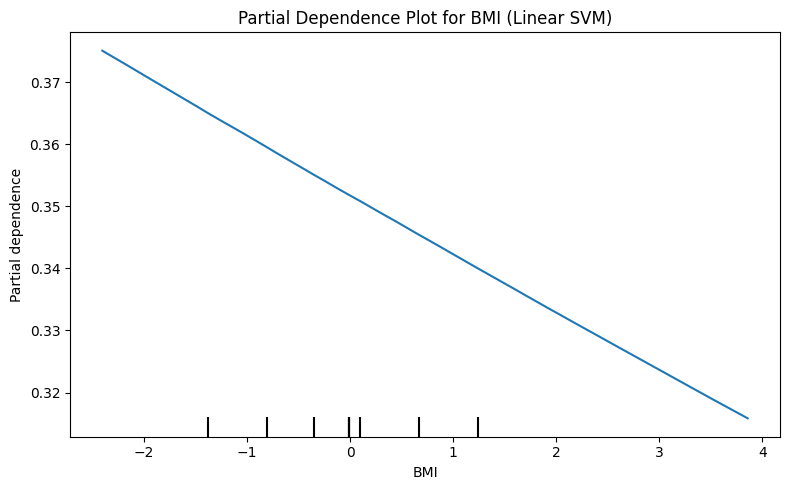

In [190]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    estimator=svm_linear,
    X=X_train_sel_df,
    features=["BMI"],        # name of the feature
    kind="average",          # only the PDP line
    grid_resolution=50,
    ax=ax
)
plt.title("Partial Dependence Plot for BMI (Linear SVM)")
plt.tight_layout()
plt.show()


# Individual Conditional Expectation (ICE)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr

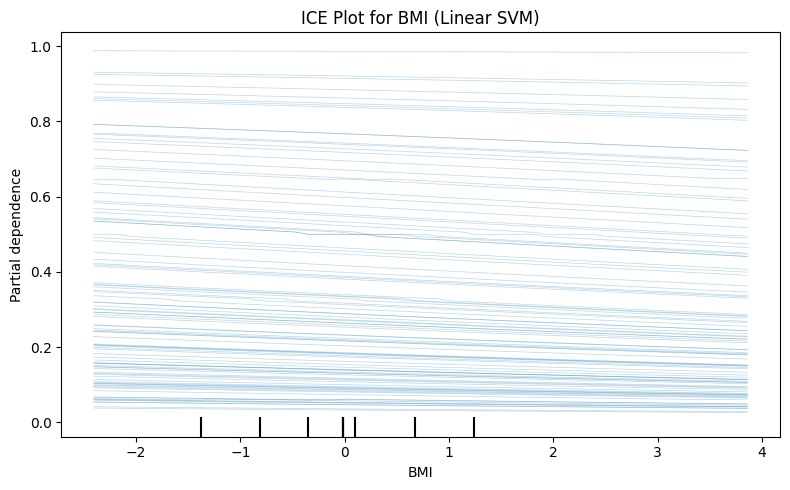

In [192]:
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    estimator=svm_linear,
    X=X_train_sel_df,
    features=["BMI"],
    kind="individual",       # only the ICE lines
    subsample=100,           # plot 100 random instances for clarity
    random_state=42,
    ax=ax
)
plt.title("ICE Plot for BMI (Linear SVM)")
plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------------------------

# Naive Bayes

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)


In [ ]:
def separate_by_class(data):
    separated = {}
    for i in range(len(data)):
        row = data.iloc[i]
        label = row[-1]
        if label not in separated:
            separated[label] = []
        separated[label].append(row)
    return separated

In [ ]:
def summarize_dataset(data):
    summaries = []
    for col in data.columns[:-1]:
        mean = data[col].mean()
        std = data[col].std()
        summaries.append((mean, std))
    return summaries

In [ ]:
def summarize_by_class(data):
    separated = separate_by_class(data)
    summaries = {}
    for class_value, rows in separated.items():
        class_df = pd.DataFrame(rows)
        summaries[class_value] = summarize_dataset(class_df)
    return summaries

In [ ]:

def calculate_probability(x, mean, std):
    if std == 0:
        return 1.0 if x == mean else 0.0
    exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

In [ ]:
def calculate_class_probabilities(summaries, row):
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, std = class_summaries[i]
            x = row[i]
            probabilities[class_value] *= calculate_probability(x, mean, std)
    return probabilities

In [ ]:
def predict(summaries, row):
    probs = calculate_class_probabilities(summaries, row)
    return max(probs, key=probs.get)

def get_predictions(summaries, test_data):
    predictions = []
    for i in range(len(test_data)):
        row = test_data.iloc[i][:-1]
        predictions.append(predict(summaries, row))
    return predictions

In [ ]:

# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
all_true = []
all_pred = []

for train_idx, test_idx in kf.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[test_idx]

    summaries = summarize_by_class(train)
    preds = get_predictions(summaries, test)
    truth = test['Outcome'].tolist()

    all_true.extend(truth)
    all_pred.extend(preds)

In [ ]:

# Evaluation
cm = confusion_matrix(all_true, all_pred)
acc = accuracy_score(all_true, all_pred)
prec = precision_score(all_true, all_pred)
rec = recall_score(all_true, all_pred)
f1 = f1_score(all_true, all_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy: %.2f%%" % (acc * 100))
print("Precision: %.3f" % prec)
print("Recall: %.3f" % rec)
print("F1-Score: %.3f" % f1)

# KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



In [ ]:


def euclidean_distance(row1, row2):
    dist = 0.0
    for i in range(len(row1) - 1):  # skip label
        dist += (row1[i] - row2[i]) ** 2
    return np.sqrt(dist)



In [ ]:
def get_neighbors(train, test_row, k):
    distances = []
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = [distances[i][0] for i in range(k)]
    return neighbors


In [ ]:

def predict_classification(neighbors):
    outcomes = [row[-1] for row in neighbors]
    prediction = max(set(outcomes), key=outcomes.count)
    return prediction

# Manual 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
k = 5


In [ ]:

all_true = []
all_pred = []

for train_index, test_index in kf.split(df):
    train_data = df.iloc[train_index].values
    test_data = df.iloc[test_index].values

    for test_row in test_data:
        neighbors = get_neighbors(train_data, test_row, k)
        pred = predict_classification(neighbors)
        all_pred.append(pred)
        all_true.append(test_row[-1])


## Confusion matrix

In [ ]:

cm = confusion_matrix(all_true, all_pred)
acc = accuracy_score(all_true, all_pred)
prec = precision_score(all_true, all_pred)
rec = recall_score(all_true, all_pred)
f1 = f1_score(all_true, all_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy: %.2f%%" % (acc * 100))
print("Precision: %.3f" % prec)
print("Recall: %.3f" % rec)
print("F1-Score: %.3f" % f1)


Confusion Matrix:
 [[394 106]
 [123 145]]
Accuracy: 70.18%
Precision: 0.578
Recall: 0.541
F1-Score: 0.559
